<a href="https://colab.research.google.com/github/annefrancine/DataScience_Estiam/blob/main/wine_svc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [4]:
#Lire le fichier wine.csv dans un DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/wine-quality/master/winequality/winequality-red.csv',sep =';')

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


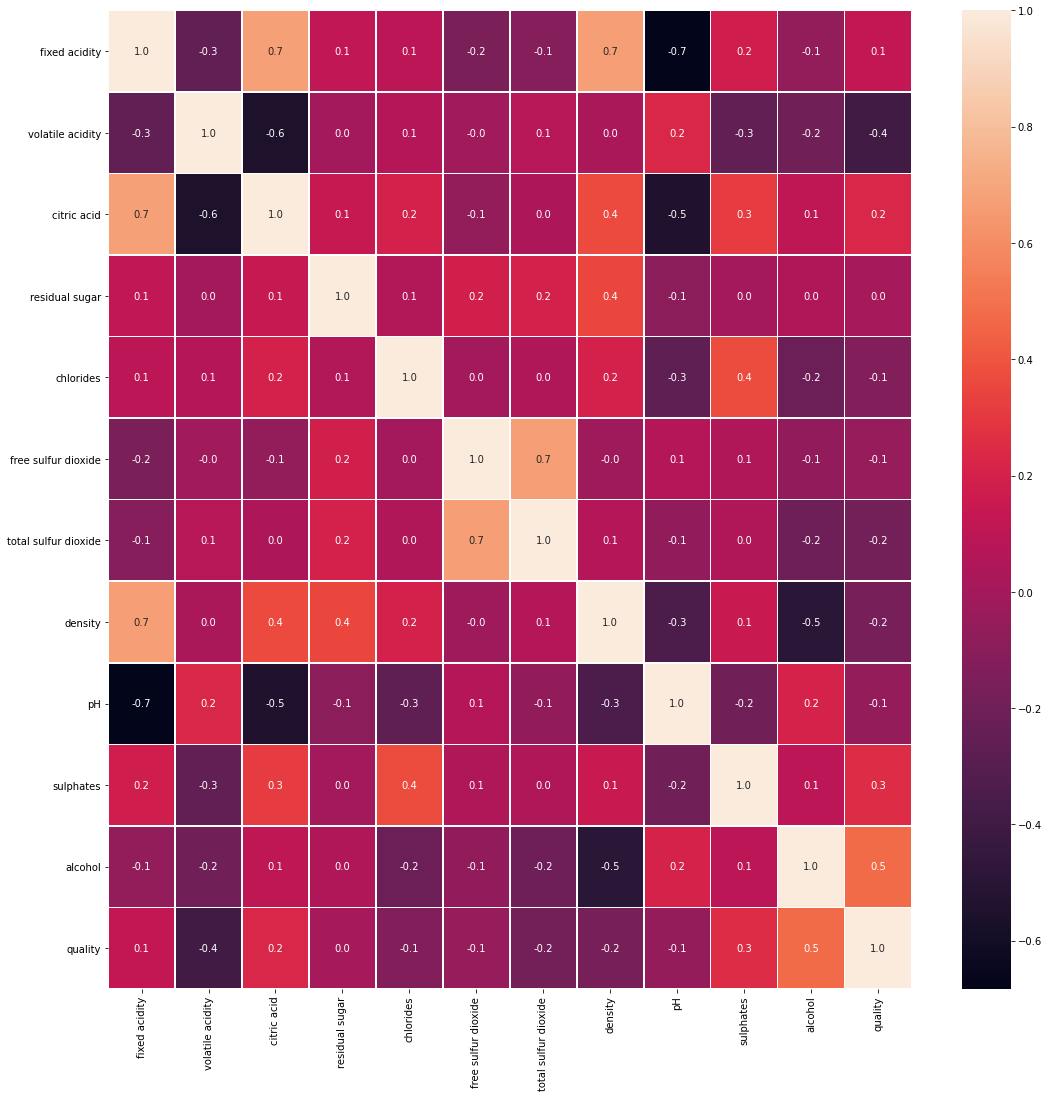

In [8]:
#correlation map 
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

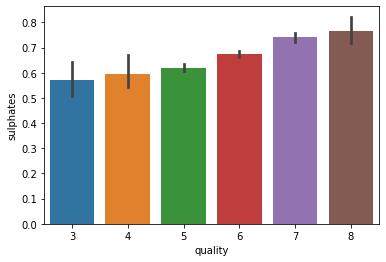

In [9]:
#quality vs sulphates
sns.barplot(x='quality', y='sulphates',data=df)

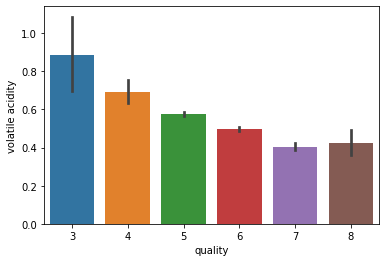

In [10]:
#quality vs volatile acidity
sns.barplot(x = 'quality', y='volatile acidity', data = df)

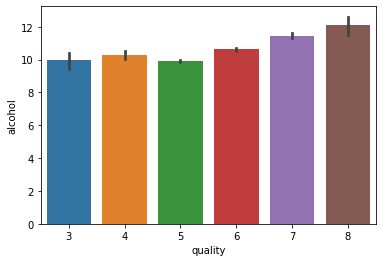

In [11]:
#quality vs alcohol
sns.barplot(x = 'quality', y='alcohol', data = df)

In [12]:
#showing counts before categorize quality column
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [13]:
#categorize wine quality
bins = (2,6.5,8)
group_names = ['bad','good']
categories = pd.cut(df['quality'], bins, labels = group_names)
df['quality'] = categories

In [14]:
#after categorize
df['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

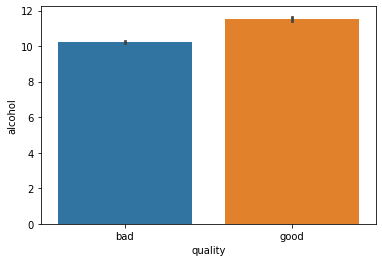

In [15]:
#barplot of quality vs alcohol.
# more alcohol, better red wine
sns.barplot(x='quality', y='alcohol',data=df)

In [16]:
# Split
X = df.drop(['quality'], axis = 1)
y = df['quality']


In [17]:
# Encoding our dependent variable:Quality column
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y


array([0, 0, 0, ..., 0, 0, 0])

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, fbeta_score

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state = 0)

normalisation des données
https://datascientest.com/normalisation-des-donnees



In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ML - SVM: https://scikit-learn.org/stable/modules/svm.html

In [24]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
#Predicting the Test Set
y_pred = classifier.predict(X_test)

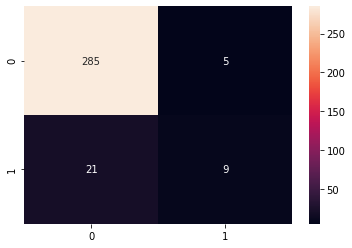

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [26]:
#k-Fold cross validation for improving our model
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train,
                             y = y_train, cv = 10)
#we can see model's average accuracy
accuracies.mean()

0.8772391732283464

In [29]:
#Grid search for best model and parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'],
               'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
#here is the best accuracy
best_accuracy


0.8944635826771654

In [31]:
#best parameters
best_parameters

{'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}

In [32]:
# Fitting Kernel SVM to the Training set with best parameters
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, gamma = 0.9)
classifier.fit(X_train, y_train)

#Predicting the Test Set
y_pred = classifier.predict(X_test)

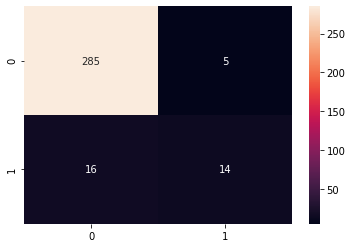

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')